$\newcommand{\calf}{{\cal F}}
\newcommand{\calk}{{\cal K}}
\newcommand{\calp}{{\cal P}}
\newcommand{\call}{{\cal L}}
\newcommand{\calg}{{\cal G}}
\newcommand{\dnu}{d \nu}
\newcommand{\dmu}{d \mu}
\newcommand{\dmup}{d \mu'}
\newcommand{\mf}{{\bf F}}
\newcommand{\md}{{\bf D}}
\newcommand{\mP}{{\bf P}}
\newcommand{\mU}{{\bf U}}
\newcommand{\vu}{{\bf u}}
\newcommand{\vx}{{\bf x}}
\newcommand{\vw}{{\bf w}}
\newcommand{\vy}{{\bf y}}
\newcommand{\vf}{{\bf f}}
\newcommand{\vs}{{\bf s}}
\newcommand{\ve}{{\bf e}}
\newcommand{\vd}{{\bf d}}
\newcommand{\vb}{{\bf b}}
\newcommand{\vg}{{\bf g}}
\newcommand{\vz}{{\bf z}}
\newcommand{\vr}{{\bf r}}
\newcommand{\mg}{{\bf G}}
\newcommand{\ml}{{\bf L}}
\newcommand{\mg}{{\bf G}}
\newcommand{\mv}{{\bf V}}
\newcommand{\ma}{{\bf A}}
\newcommand{\mi}{{\bf I}}
\newcommand{\mm}{{\bf M}}
\newcommand{\mb}{{\bf B}}
\newcommand{\ball}{{\cal B}}
\newcommand{\ptc}{{\Psi TC}}
\newcommand{\diag}{\mbox{diag}}
\newcommand{\begeq}{{\begin{equation}}}
\newcommand{\endeq}{{\end{equation}}}
$

In [1]:
include("fanote_init.jl")

# Chapter 5: Case studies

## Section 5.1: Conductive-Radiative Heat Transfer

In this section we consider a multi-physics problem where conductive
and radiative heat transfer are coupled. Our description of the
problem is from 
<cite data-cite="ctk:xferheat"><a href="siamfa.html#ctk:xferheat">(Kel96)</cite>,
<cite data-cite="ctk:xferheat2"><a href="siamfa.html#ctk:xferheat2">(BK98)</cite>,
<cite data-cite="ctk:xferheat3"><a href="siamfa.html#ctk:xferheat3">(BK99)</cite>.
These
models have applications to
the study of porous materials
such as fibers, powders, and foams
used in insulations at either very low or very high temperatures,
heat treatment of ceramics, and the thermal properties of coated materials,
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>,
<cite data-cite="siegelhowell92"><a href="siamfa.html#isiegelhowell92">(SH92)</cite>,
<cite data-cite="viskanta65"><a href="siamfa.html#viskanta65">(Vis65)</cite>.

### Section 5.1.1: The Equations

We begin with the continuous formulation of the
normalized and dimensionless equations for the problem
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>,
<cite data-cite="siegelhowell92"><a href="siamfa.html#isiegelhowell92">(SH92)</cite>,
<cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>,
<cite data-cite="cesheat2"><a href="siamfa.html#cesheat2">(Sie95)</cite>.
We will focus
on one of the simpler problems in <cite data-cite="cesjrt"><a href="siamfa.html#cesjrt">(ST91)</cite>.
Our formulation
is taken directly from <cite data-cite="ctk:xferheat2"><a href="siamfa.html#ctk:xferheat2">(BK98)</cite>.

We will discuss one way to discretize the problem in a later section.
We refer the reader to
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>,
<cite data-cite="siegelhowell92"><a href="siamfa.html#isiegelhowell92">(SH92)</cite>,
<cite data-cite="viskanta65"><a href="siamfa.html#viskanta65">(Vis65)</cite>
for the derivation of the
equations.

The unknowns are
the dimensionless intensity $\psi(x,\mu)$
of radiation at a point $x$ in the direction
having cosine $\mu$ with the positive $x$ axis and the dimensionless
temperature $\Theta(x)$ at $x$.

The radiative transport equation is
$$
\mu \dfrac{\partial \psi}{\partial x} (x,\mu) + \psi(x,\mu) =
\dfrac{c(x)}{2} \int_{-1}^1 \psi(x, \mu') \dmup + (1 - c(x)) \Theta^4(x),
$$
for $x \in (0,\tau)$ with boundary conditions
$$
\psi(0,\mu)= \Theta_l^4, \mu > 0
$$
and
$$
\psi(\tau, \mu) = \Theta_r^4,  \mu < 0.
$$
Here
$$
0 \le c(x) \le 1 \mbox{ for all $x \in [0,\tau]$.}
$$
We assume that $c$ is continuous.

$\psi$ is the
__angular flux__.
Define the
__scalar flux__
$$
f(x) = \frac{1}{2} \int_{-1}^1 \psi(x, \mu') \dmup.
$$

The temperature $\Theta$ satisfies the boundary value problem
$$
\frac{\partial^2 \Theta}{\partial x^2} = Q(x), x \in [0,\tau], \,
\Theta(0) = \Theta_l, \Theta(\tau) = \Theta_r,
$$
and couples to the radiative transport equation by
$$
Q(x)
= \frac{1}{2 N_c} \frac{d}{dx} \int_{-1}^1 \mu' \psi(x, \mu') \dmup,
$$
where $N_c$ is the conduction to radiation parameter
<cite data-cite="ozisik"><a href="siamfa.html#ozisik">(M. 73)</cite>.

The order of integration and differentiation
in the definition of $Q$ can be changed 
<cite data-cite="ctk:xferheat"><a href="siamfa.html#ctk:xferheat">(Kel96)</cite>    
and we obtain, using the transport equation \eqnok{transport} and
the definition of $f$,
$$
\begin{array}{ll}
\dfrac{d}{dx} \int_{-1}^1 \mu' \psi(x, \mu') \dmup
& = \int_{-1}^1 \mu' \frac{\partial}{\partial x} \psi(x, \mu') \dmup\\
\\
& = - 2 (1 - c(x)) f(x) + 2 (1 - c(x)) \Theta^4(x).
\end{array}
$$
Hence,
$$
Q(x) = \alpha(x) (\Theta^4(x) - f(x)), 0 < x < \tau
$$
where
$$
\alpha(x) = (1 - c(x))/N_c.
$$


### Section 5.1.2: Formulation as a Fixed Point Problem

In Section __5.1.5__ we will show that the transport equation
is equivalent to a linear
integral equation for $f$
$$
f - \call_1 f = \call_2(\Theta^4) + g
$$
where $L_1$ and $L_2$ are compact operators on $C[0,\tau]$ and $g \in C[0,\tau]$
depends on the boundary data. We can solve the integral equation efficiently with
GMRES, for example, and that is what we will do for our computations.

The operators $\call_1$ and $\call_2$ are related by
$$
\call_1 w = \calk(c w) \mbox{ and } \call_2 w = \calk ((1 - c) w).
$$
The operator $\calk$ is defined for $u \in C[0,\tau]$ by
$$
\calk(u)(x) = \int_0^\tau k(x,y) u(y) dy
$$
where
$$
k(x,y) = \frac{1}{2} \int_0^1 \exp(|x - y|/\mu) \frac{\dmu}{\mu}.
$$
Our discretization will be based on the derivation of the integral equation
and not directly on the integral equation itself. In this way one does
not have to struggle with a quadrature rule for integrals against $k(x,y)$.

So, given $\Theta$, one can recover $f$ via
$$
f = (I - \call_1)^{-1} ( \call_2 (\Theta^4) + g)
$$

Let $D_2^{-1}$ be the solution operator for
$$
\frac{\partial^2 u}{\partial x^2} = h(x); \ u(0) = u(\tau) = 0,
$$
and
$$
\Theta_0(x) = (1 - x) \Theta_l + x \Theta_r.
$$
Then \eqnok{heat} is equivalent to
$$
\Theta = D_2^{-1} Q + \Theta_0.
$$
Recall that the discretization of of the second derivative operator is a tridiagonal matrix
and hence $D_2^{-1}$ can be applied efficiently.

Hence, we can combine the equations above to obtain
a fixed point problem for $\Theta$.
$$
\begin{array}{ll}
\Theta & = \calg(\Theta) \equiv D_2^{-1} Q  + \Theta_0 \\
\\
& = D_2^{-1} ( \alpha (\Theta^4 - f) )  + \Theta_0\\
\\
& = D_2^{-1} (\alpha (\Theta^4 - (I - \call_1)^{-1} ( \call_2 (\Theta^4) + g) ))
+ \Theta_0.
\end{array}
$$

We will compare Newton-Krylov methods with Anderson acceleration for
this problem. Either approach needs an efficient evaluation of the
discretization of the fixed point map $\calg$. The steps in the
evaluation of $\calg$ are

-  1. Given $\Theta$ solve the transport equation by solving the integral form with an iterative method.
-  2. Use the solution $f$ of the transport equation from step 1 to build $Q = \alpha (\Theta^4_{in} - f)$.
-  3.  Compute $\calg(\Theta) = D_2^{-1}(Q) + \theta_0$ with a fast solver.


We have covered step 3 previously and will discuss step 1 in
Sections __5.1.3__ and __5.1.4__

### Section 5.1.3: Derivation of the Integral Form of the Transport Equation

n

### Section 5.1.5: Newton-GMRES vs Anderson Acceleration

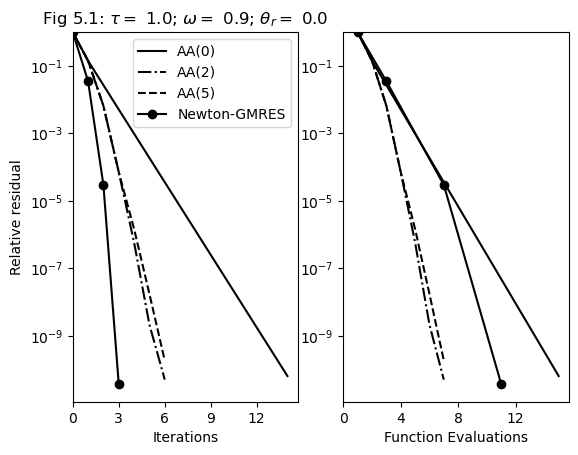

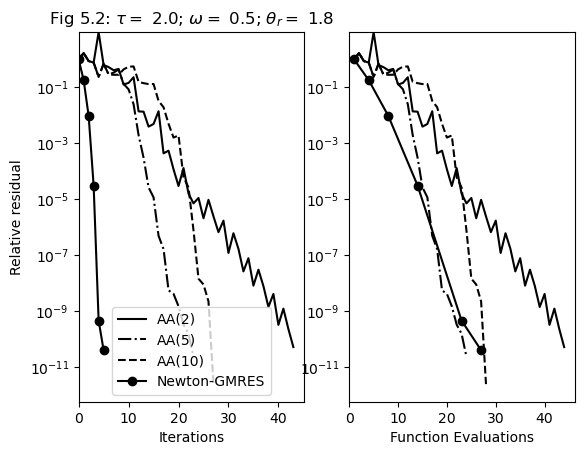

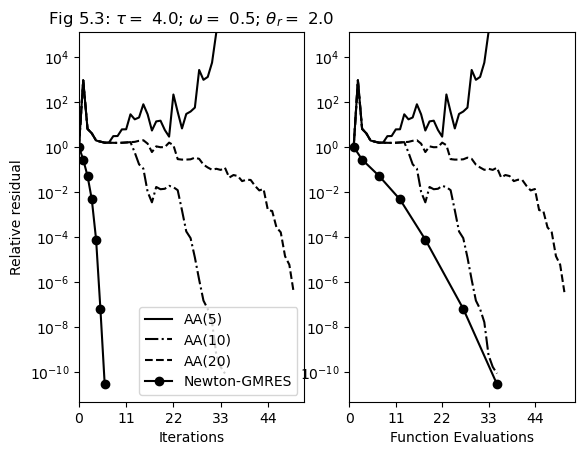

Diverging for m=5 in aasol.jl.
thetar = 2.00000e+00, tau=4.00000e+00, omega=5.00000e-01
Failure to converge after 50 iterations for m=20 in aasol.jl
thetar = 2.00000e+00, tau=4.00000e+00, omega=5.00000e-01


┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/ctk/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [2]:
vary_xferheat_parms();